In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import multiprocessing
from functools import partial
from PIL import Image
import numbergen as ng
import imagen as ig
from skimage.transform import resize
import time
import cv2

In [112]:
def show_random_pattern(pattern):
    plt.figure(figsize=(10,5))
    plt.imshow(pattern, cmap='gray')
    plt.show()

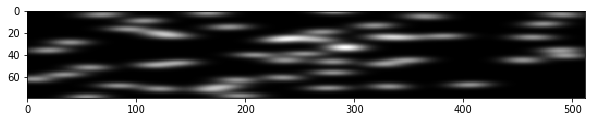

In [206]:
def random_pattern():
    fract = 80/512
    gs = ig.Composite(operator=np.add,
                  generators=[ig.Gaussian(size=0.05,
                                          scale=0.02,
                                          x=(ng.UniformRandom(seed=i+1)-0.5),
                                          y=(ng.UniformRandom(seed=i+2)-0.5),
                                          aspect_ratio=1.1,
                                          orientation=np.pi*ng.UniformRandom(seed=i+3),) for i in range(50)],
                                          xdensity=512,
                                          ydensity=80)
    ret = gs()
    # ret = cv2.resize(ret, (512, 80))
    return ret
    
pattern = random_pattern()
show_random_pattern(pattern)

In [4]:
from ssn.random_pattern import random_pattern
from PIL import Image
import cv2

In [119]:
pattern_generator = random_pattern()

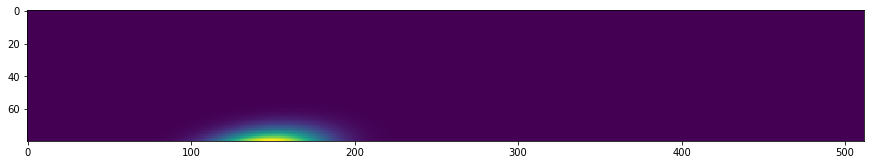

3499.999999999999


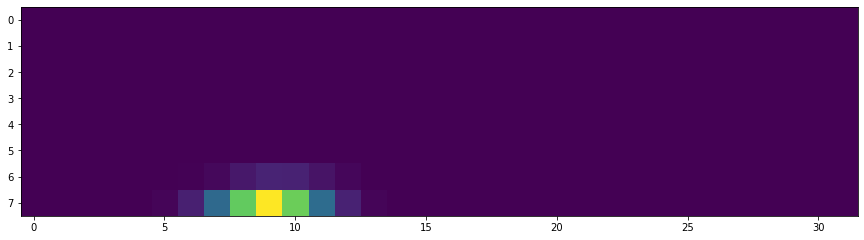

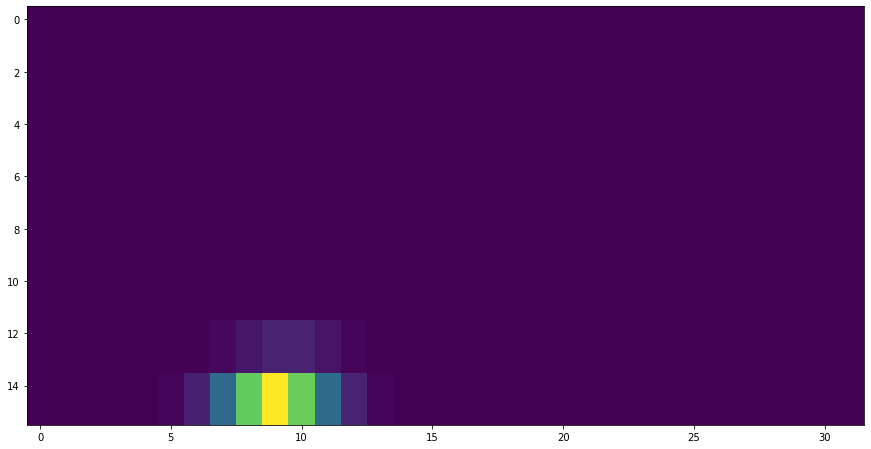

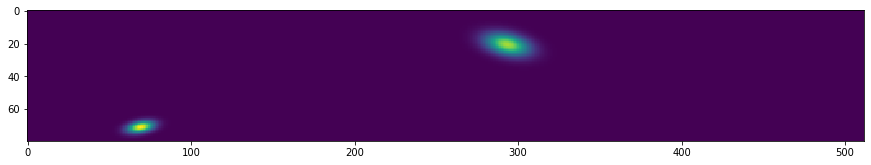

3499.999999999999


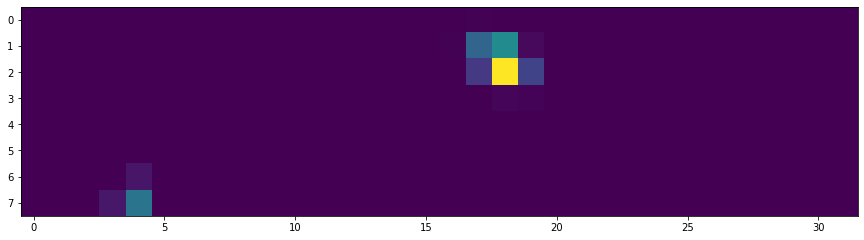

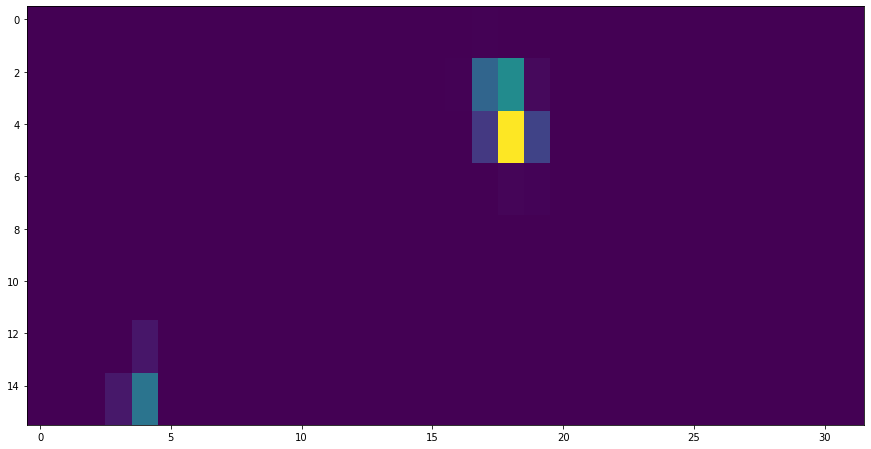

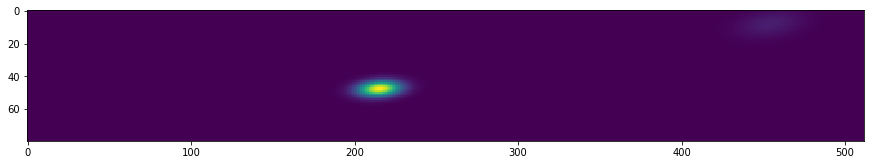

3500.0


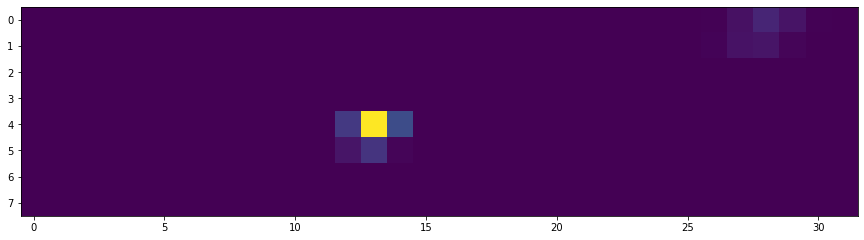

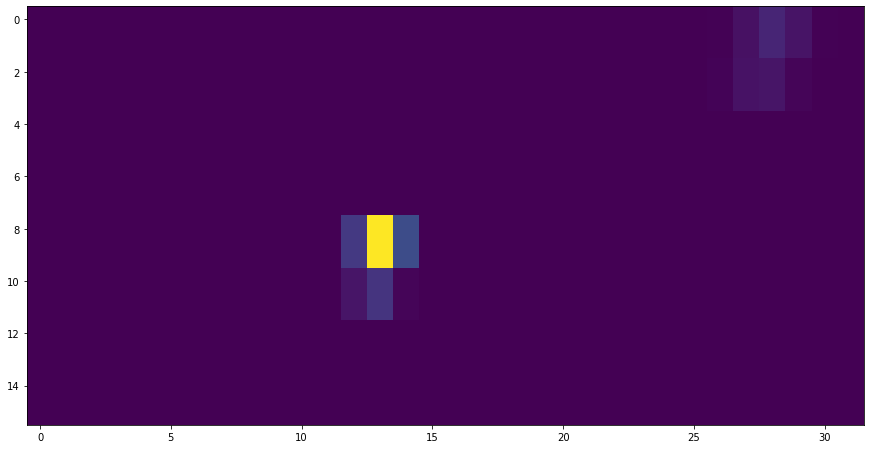

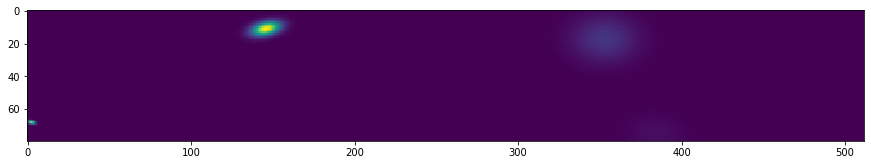

3499.9999999999995


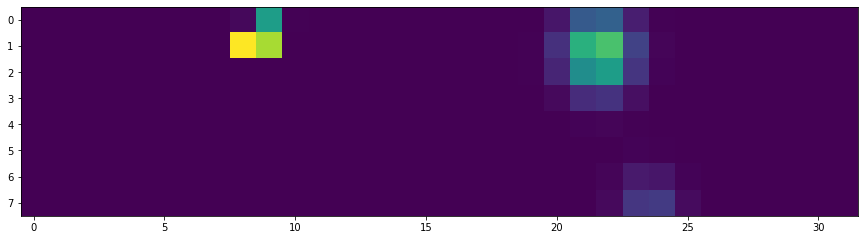

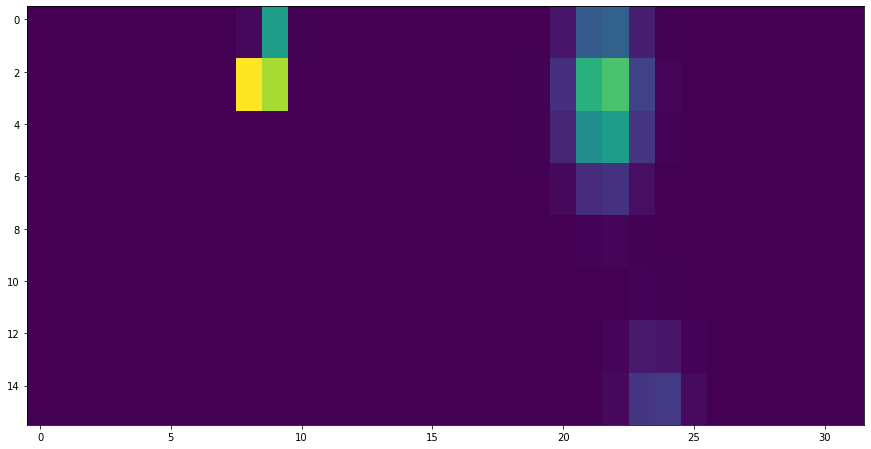

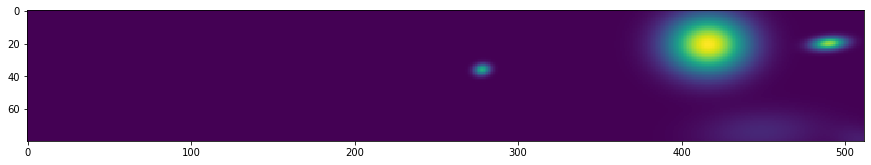

3500.000000000001


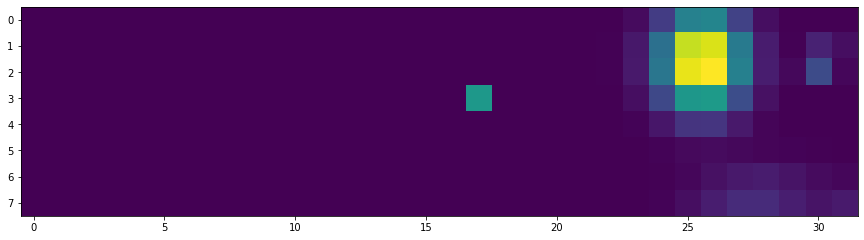

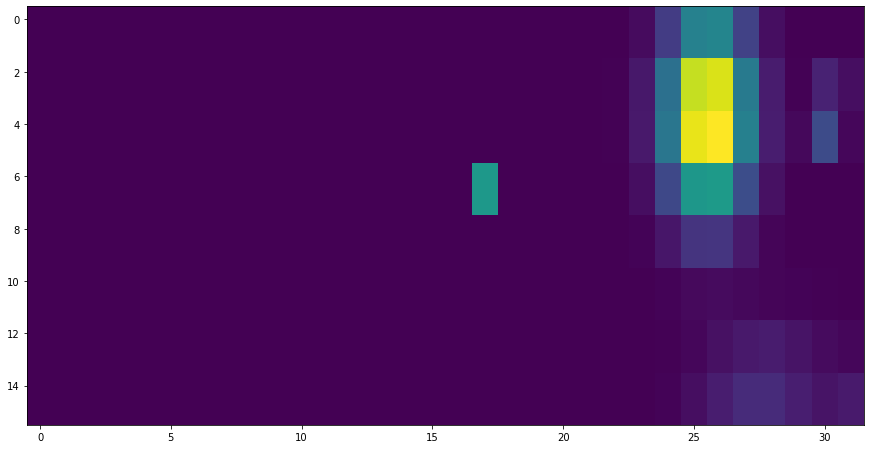

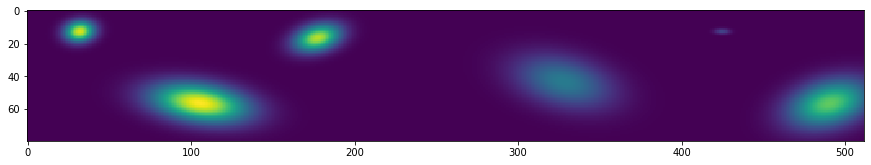

3500.0


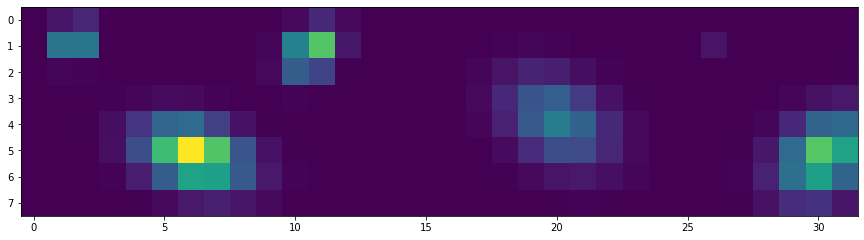

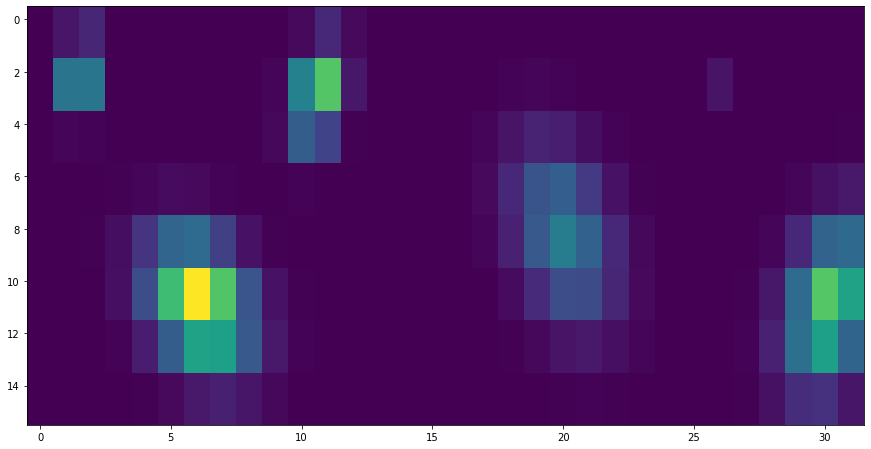

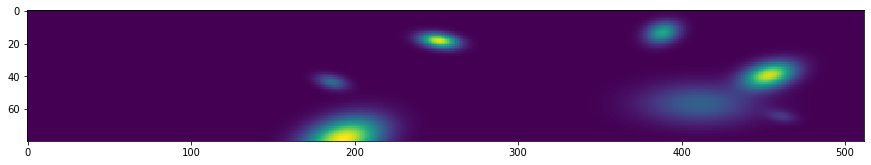

3500.0


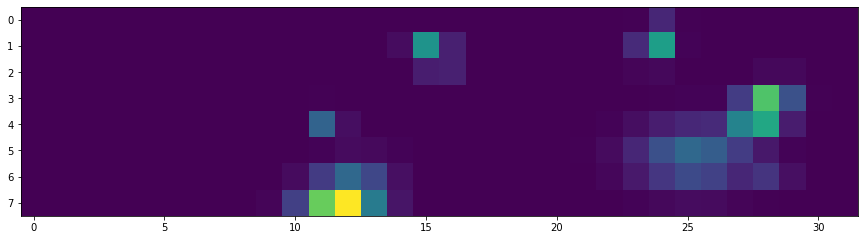

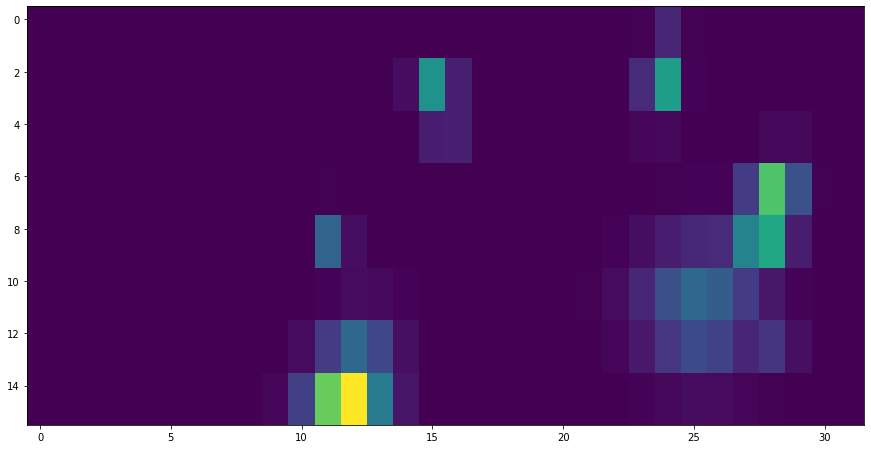

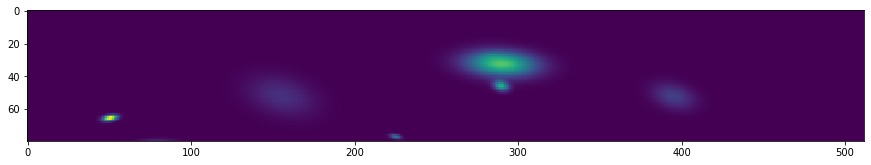

3500.0


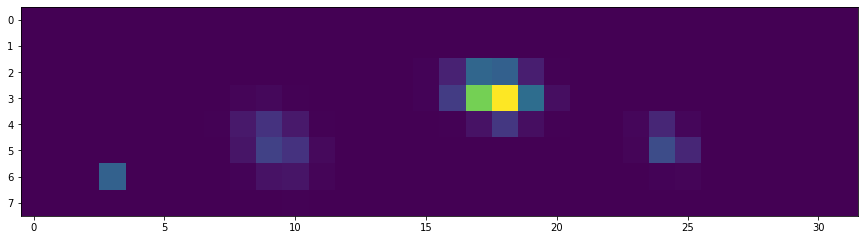

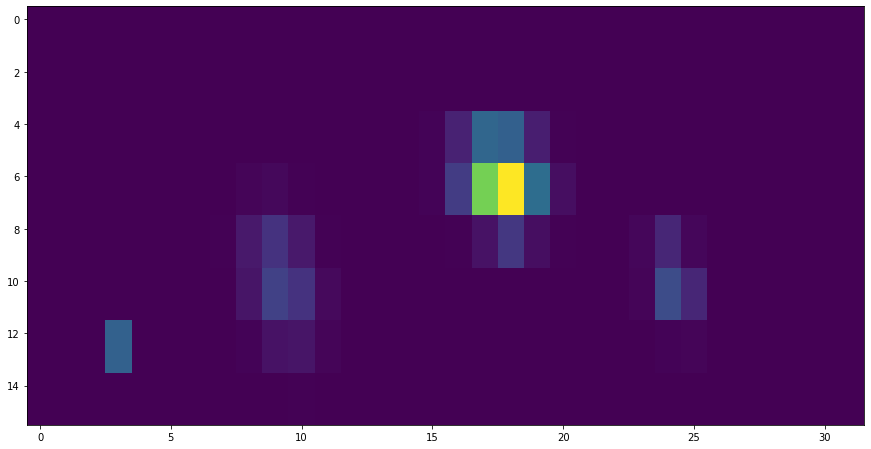

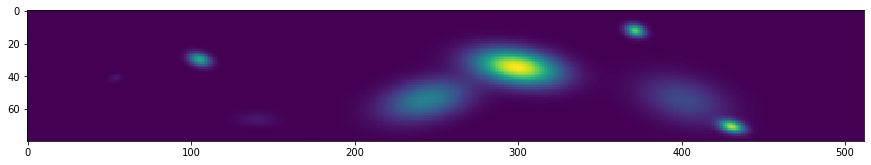

3499.9999999999995


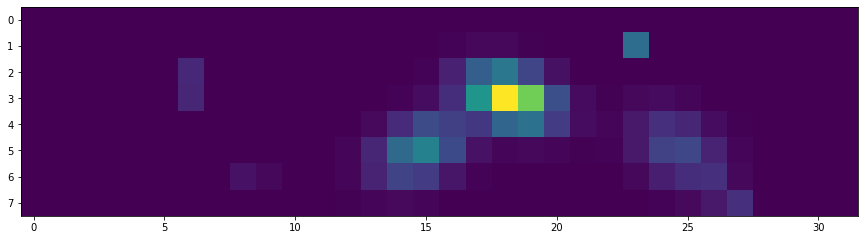

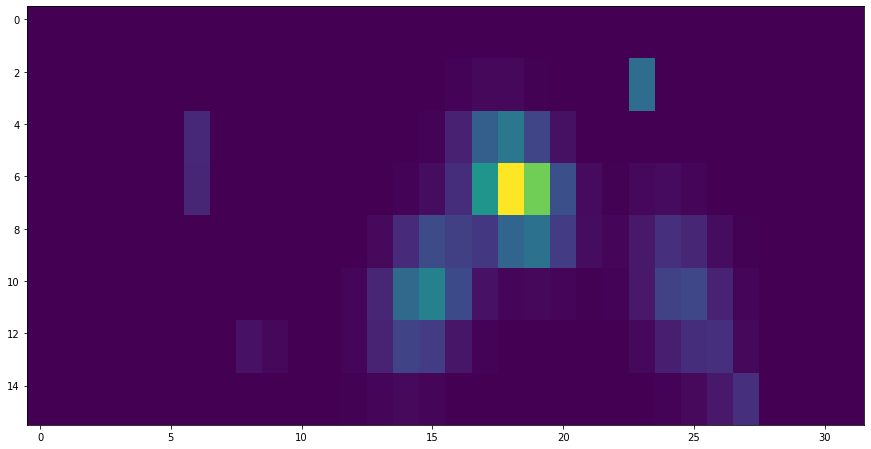

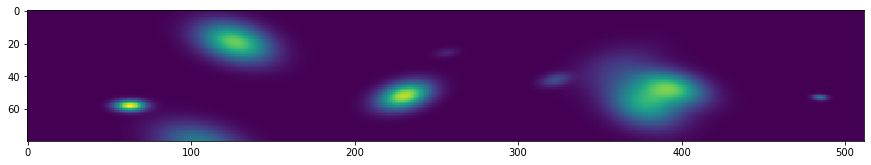

3500.0


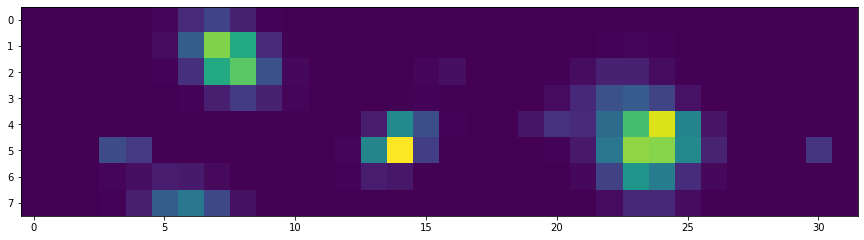

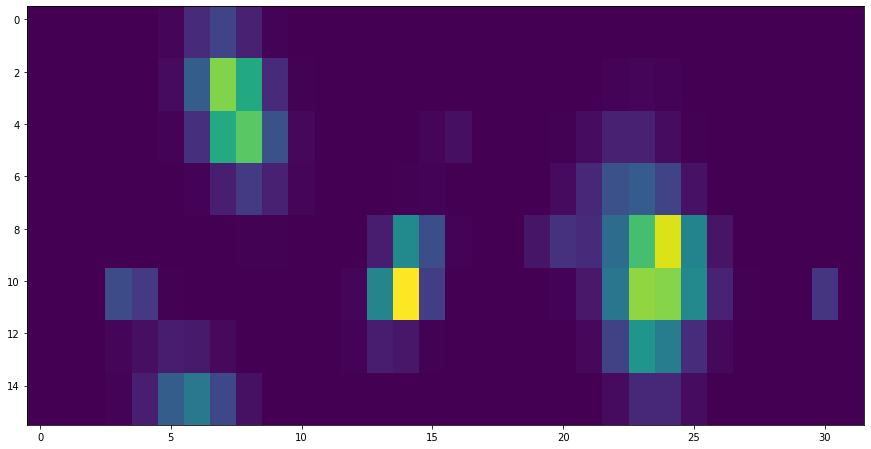

In [132]:
pattern = pattern_generator.get_pattern()
for i in range(10):
    pattern = pattern_generator.get_pattern(i+1, size=0.1)
    show(pattern)    
    print(np.sum(pattern))
    pattern = cv2.resize(pattern, (32, 8))
    show(pattern)
    pattern = cv2.resize(pattern, (32, 16), interpolation=cv2.INTER_NEAREST)
    show(pattern)
    

In [27]:
def show(img, title=''):
    plt.figure(figsize=(15,10))
    plt.imshow(img)
    plt.title(title)
    plt.show()

pattern generation took: 0.41564011573791504s


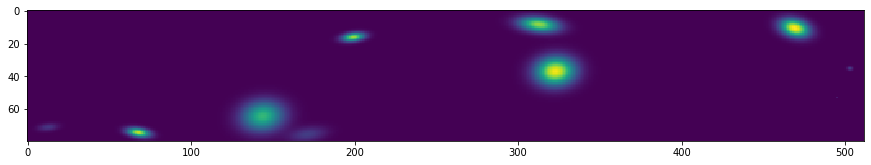

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


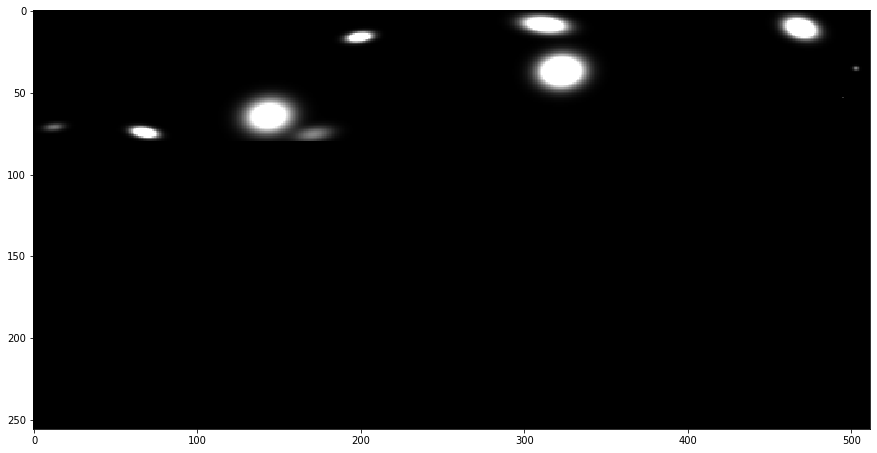

min: 0.0, max: 2.9397079763414764


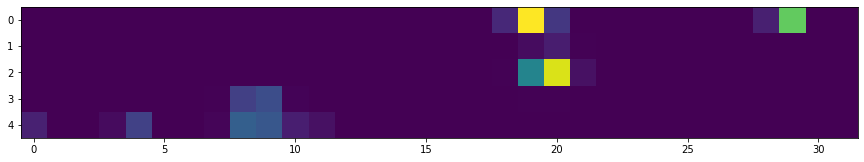

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


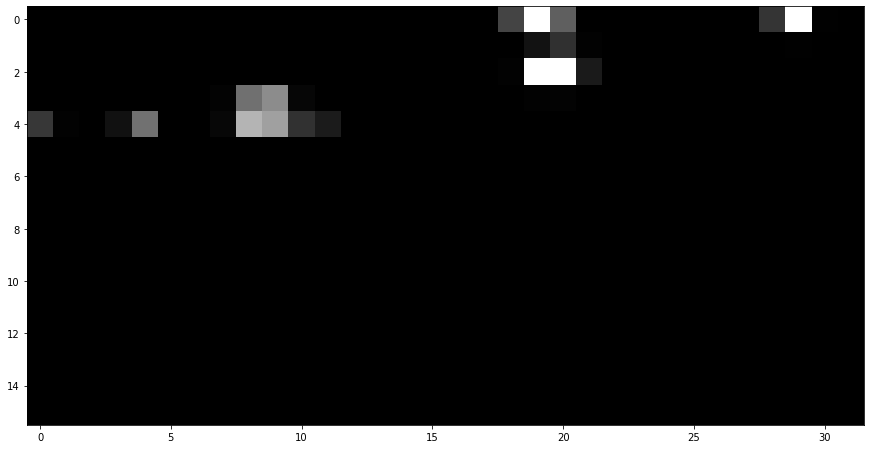

In [98]:
s = time.time()
pattern, mts_pattern = pattern_generator.get_pattern(num=10, size=0.05, mitsuba=True)
print('pattern generation took: {}s'.format(time.time() - s))

show(pattern)
show(mts_pattern)
print('min: {}, max: {}'.format(np.min(mts_pattern), np.max(mts_pattern)))
pattern = cv2.resize(pattern, (32, 5))
mts_pattern = cv2.resize(mts_pattern, (32, 16))

show(pattern)
show(mts_pattern)

plt.imsave("test_pattern.png", mts_pattern/np.max(mts_pattern))
np.save('test_pattern.npy', pattern)

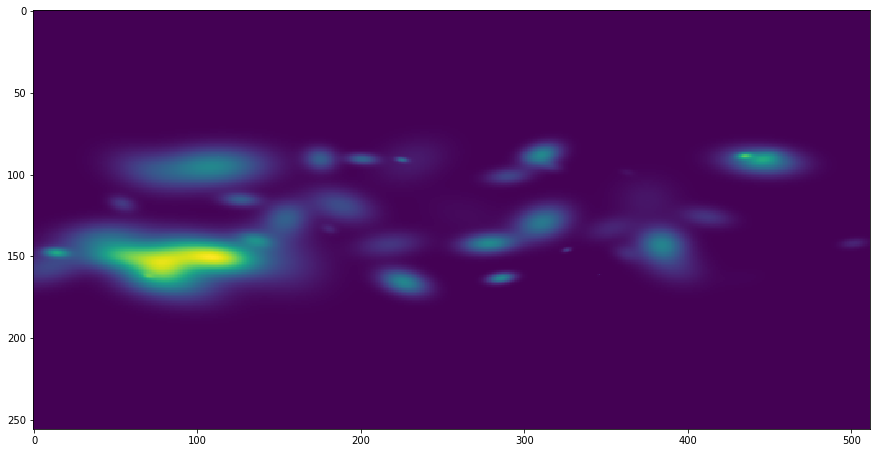

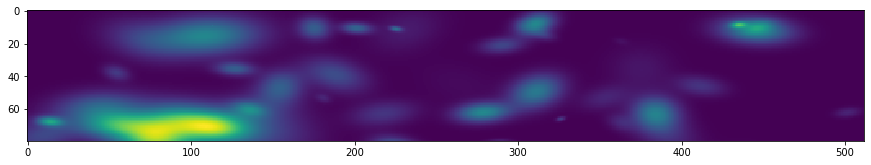

In [38]:
num, size, scale, seed =50, 0.1, 3.0, 19920208
xdensity, ydensity = 512, 80
factor = 80/256
gs = ig.Composite(operator=np.add,
                  generators=[ig.Gaussian(
                              size=size*ng.UniformRandom(seed=seed+i+4),
                              scale=scale*ng.UniformRandom(seed=seed+i+5),
                              x=ng.UniformRandom(seed=seed+i+1)-0.5,
                              y=(ng.UniformRandom(seed=seed+i+2)-0.5)*factor,
                              aspect_ratio=0.7,
                              orientation=np.pi*ng.UniformRandom(seed=seed+i+3),
                              ) for i in range(num)],
                  position=(0, 0), 
                  xdensity=xdensity)

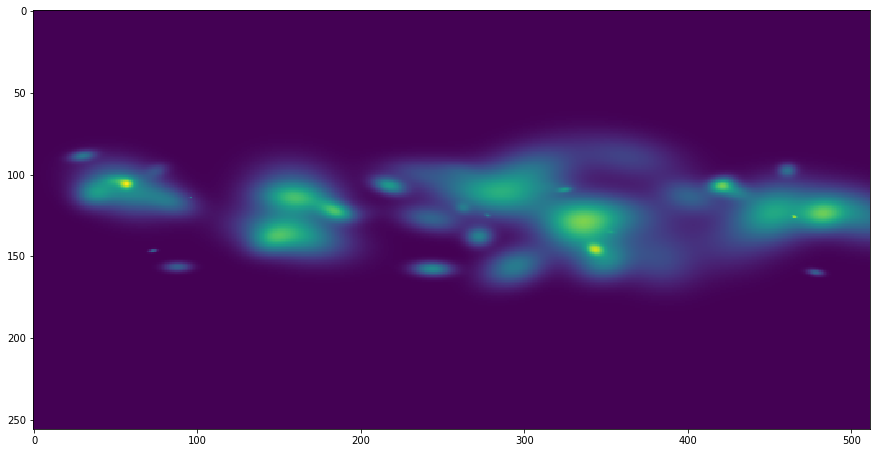

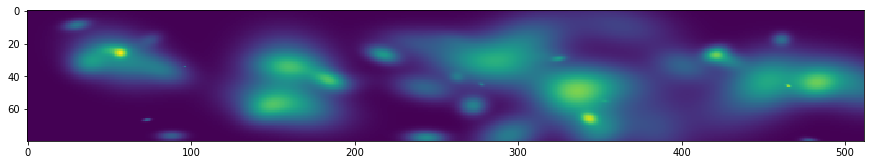

In [39]:
img = gs()
show(img)
show(img[80:80+80])

In [14]:
import imageio

test_ibl = '/home/ysheng/Dataset/ibls/real/20050806-03_hd.hdr'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


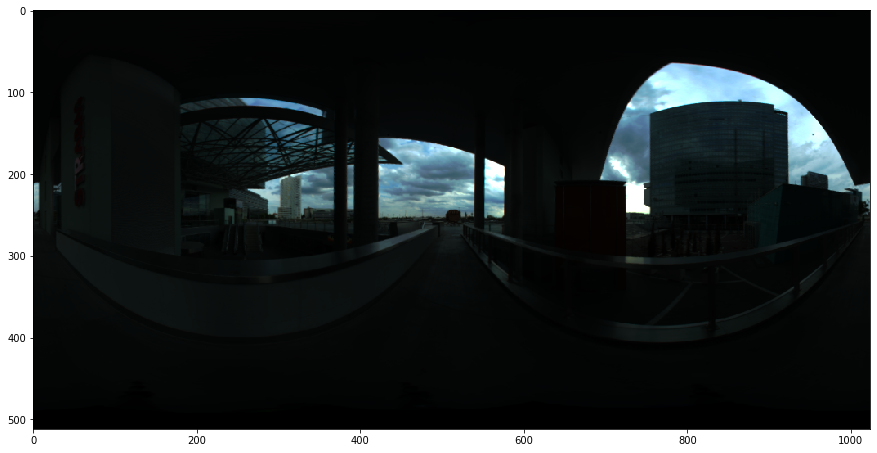

In [15]:
ibl = imageio.imread(test_ibl)
show(ibl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


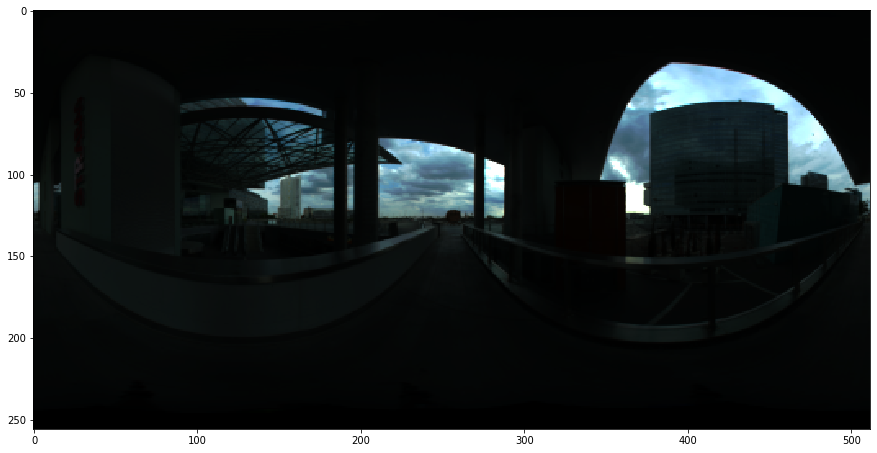

In [17]:
normalized_ibl = cv2.resize(ibl, (512, 256))
show(normalized_ibl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


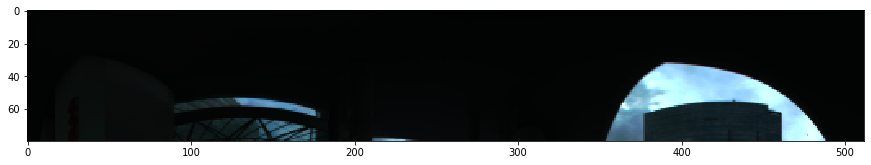

In [18]:
show(normalized_ibl[:80])

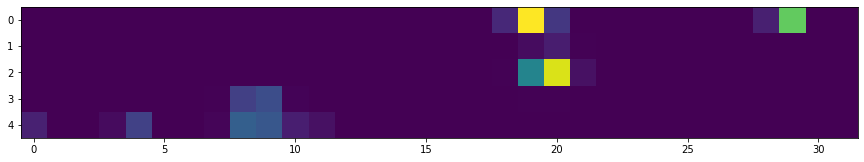

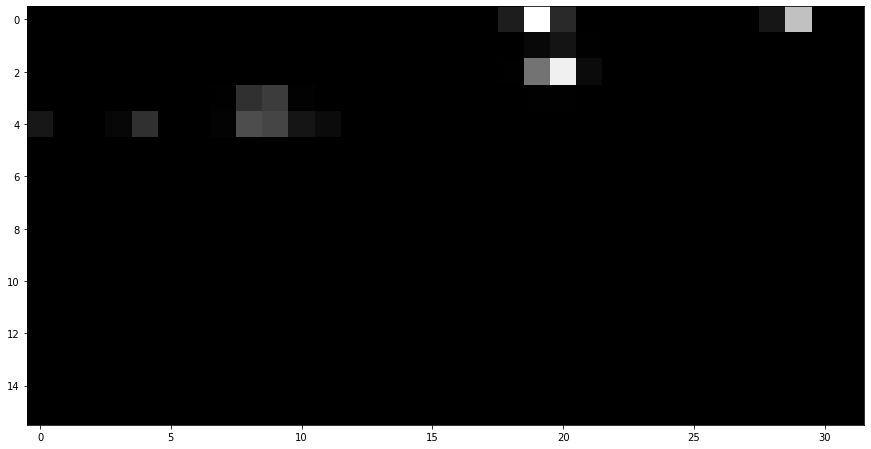

In [101]:
test_pattern_ibl = np.load('test_pattern.npy')
mts_pattern = plt.imread('test_pattern.png')

show(test_pattern_ibl)
show(mts_pattern)

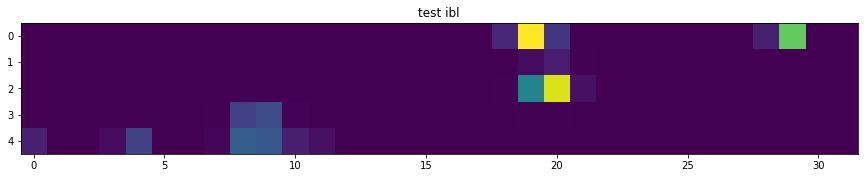

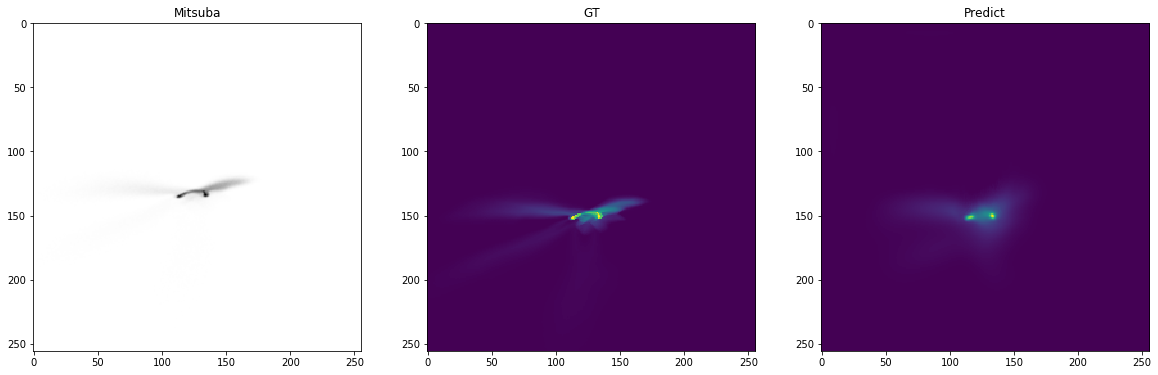

In [133]:
mitsuba_gt, net_gt_path, predict_path = 'evaluation/dbg/mitsuba_shadow.png', 'evaluation/dbg/net_gt_shadow.npy', 'evaluation/dbg/prediction_shadow.npy'
mitsuba_gt, net_gt, predict = plt.imread(mitsuba_gt), np.load(net_gt_path), np.load(predict_path)
show(test_pattern_ibl, 'test ibl')

fig = plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(mitsuba_gt)
plt.title('Mitsuba')

plt.subplot(1, 3, 2)
plt.imshow(net_gt)
plt.title('GT')

plt.subplot(1, 3, 3)
plt.imshow(predict)
plt.title('Predict')
plt.show()

In [137]:
net_gt_normalize = np.copy(net_gt)
cv2.normalize(net_gt, net_gt_normalize, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite('test.png', net_gt_normalize)

True